## A/B testing Using Machine Learning 

### ML modelling with MLOps

### Spliting the data by browser and platform_os, and versioning each split as a new version of the data in dvc

In [45]:
# Importing necessary packages
import numpy as np
from numpy import mean, std
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import export_graphviz



### Loading the data of Users that Responded

In [2]:
# Loading from my local storage
path_to_data = "../data/Resp_dataSet.csv"
data=pd.read_csv(path_to_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   1172 non-null   object
 1   experiment   1172 non-null   object
 2   date         1172 non-null   object
 3   hour         1172 non-null   int64 
 4   device_make  1172 non-null   object
 5   platform_os  1172 non-null   int64 
 6   browser      1172 non-null   object
 7   yes          1172 non-null   int64 
 8   no           1172 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 82.5+ KB


### Splitting the Data


In [3]:
# Checking the Most used Browsers and Platform_os
def high_frequency_category(data, column):
    list_Of_Handset_In_Column=list(data[column].value_counts().index)
    top_category_column = data[column].value_counts()
    
    return list_Of_Handset_In_Column, top_category_column

list_Of_browsers, top_browsers = high_frequency_category(data, "browser")
list_Of_platform_os, top_platform_os = high_frequency_category(data, "platform_os")

print(f" There are {len(list_Of_browsers)} browsers, and {len(list_Of_platform_os)} Platform Os used")

 There are 8 browsers, and 2 Platform Os used


Text(0.5, 1.0, 'List_Of_Top10_Platfrom_os Used')

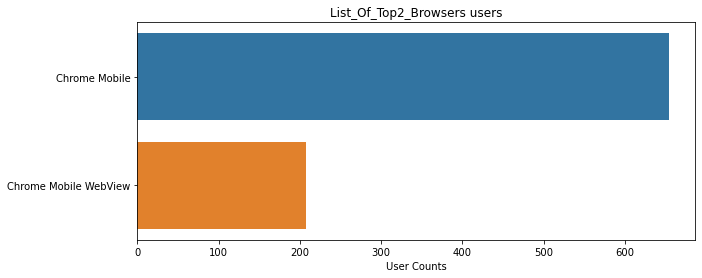

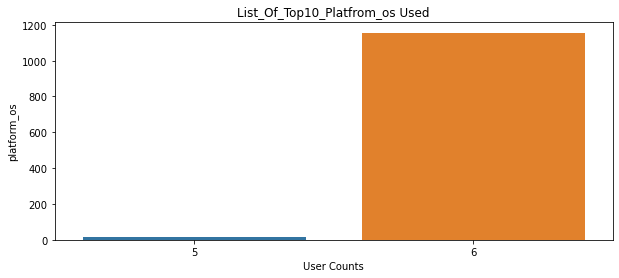

In [4]:
# Printing the 2 Most used Browsers and top_platform_os
plt.figure(figsize=(10,4))
sns.barplot(y = list_Of_browsers[:2], x = top_browsers[:2])
plt.xlabel('User Counts')
plt.title('List_Of_Top2_Browsers users')

plt.figure(figsize=(10,4))
sns.barplot(x = list_Of_platform_os[:2], y = top_platform_os[:2])
plt.xlabel('User Counts')
plt.title('List_Of_Top10_Platfrom_os Used')

In [20]:
# Using two most used Browsers and two most used platform_os, separating the data to form 4 dataset
def split_data(data, column, column_value):
    try:
        new_data_set = data[data[column]== column_value]
        
        return new_data_set
    except KeyError as e:
        print("Error occured, Try again",e)
        return data

browser1_dataset = split_data(data, "browser", "Chrome Mobile")
browser2_dataset = split_data(data, "browser", "Chrome Mobile WebView")
platform_os1_dataset = split_data(data, "platform_os", 6)
platform_os2_dataset = split_data(data, "platform_os", 5)

### Combining the 'yes' and 'no' column to form 'aware' column

In [21]:
def drop_column(dataset):
    # for dataset in datasets_name:
    dataset['aware'] = dataset['yes']
    dataset = dataset.drop(columns = ['auction_id','yes','no'], axis=1).reset_index()
    
    return dataset

# datasets_name = [browser1_dataset, browser2_dataset, platform_os1_dataset, platform_os2_dataset]
browser1_dataset = drop_column(browser1_dataset)
browser2_dataset = drop_column(browser2_dataset)
platform_os1_dataset = drop_column(platform_os1_dataset)
platform_os2_dataset = drop_column(platform_os2_dataset)
# platform_os2_dataset.head()

<ipython-input-21-54bb9c06a27f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['aware'] = dataset['yes']


In [22]:
platform_os2_dataset.head()

,index,experiment,date,hour,device_make,platform_os,browser,aware
0,355,control,2020-07-03,15,iPhone,5,Mobile Safari,0
1,356,control,2020-07-03,15,iPhone,5,Mobile Safari UI/WKWebView,0
2,443,control,2020-07-04,3,iPhone,5,Mobile Safari,1
3,529,exposed,2020-07-05,3,iPhone,5,Mobile Safari,1
4,585,exposed,2020-07-08,5,iPhone,5,Mobile Safari,0


### Saving the New dataSets to new data Versions

In [23]:
# datasets_name = [browser1_dataset, browser2_dataset, platform_os1_dataset, platform_os2_dataset]
def save_new_dataset(dataset, dataset_name):
    print(">", dataset_name)
    try:
        dataset.to_csv('../data/'+dataset_name+'.csv', index=False)

    except Exception as e:
        print(e)

In [24]:
save_new_dataset(browser1_dataset, 'browser1_dataset')
save_new_dataset(browser2_dataset, 'browser2_dataset')
save_new_dataset(platform_os1_dataset, 'platform_os1_dataset')
save_new_dataset(platform_os2_dataset, 'platform_os2_dataset')

> browser1_dataset
> browser2_dataset
> platform_os1_dataset
> platform_os2_dataset


In [25]:
# Showing the contents of the datasets
path_to_data = "../data/browser1_dataset.csv"
new_dataset1=pd.read_csv(path_to_data)
new_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        654 non-null    int64 
 1   experiment   654 non-null    object
 2   date         654 non-null    object
 3   hour         654 non-null    int64 
 4   device_make  654 non-null    object
 5   platform_os  654 non-null    int64 
 6   browser      654 non-null    object
 7   aware        654 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 41.0+ KB


### New dataset saved to Local data Storage

## For each version of the data do the following;
- Split the data into 70% training, 20% validation, and 10% test sets,
- Based on the reading material provided, apply machine learning to the training data. Train a machine learning model using 5-fold cross validation using the following 3 different algorithms:
    - Logistic Regression 
    - Decision Trees
    - XGBoost

### Splitting Data into Training, validation and Test sets


In [28]:
# Data Preparation
def encode_labels(dataframe):

    experiment_encoder = preprocessing.LabelEncoder()
    date_encoder = preprocessing.LabelEncoder()
    hour_encoder = preprocessing.LabelEncoder()
    device_encoder = preprocessing.LabelEncoder()
    browser_encoder = preprocessing.LabelEncoder()
    platform_encoder = preprocessing.LabelEncoder()
    aware_encoder = preprocessing.LabelEncoder()
    
    
    dataframe['date'] = date_encoder.fit_transform(dataframe['date'])
    dataframe['hour'] = hour_encoder.fit_transform(dataframe['hour'])
    dataframe['device_make'] = device_encoder.fit_transform(dataframe['device_make'])
    dataframe['browser'] = browser_encoder.fit_transform(dataframe['browser'])
    dataframe['experiment'] = experiment_encoder.fit_transform(dataframe['experiment'])
    dataframe['platform_os'] = platform_encoder.fit_transform(dataframe['platform_os'])
    dataframe['aware'] = aware_encoder.fit_transform(dataframe['aware'])
    
    return dataframe #, date_encoder, hour_encoder, device_encoder, browser_encoder, experiment_encoder, platform_encoder, aware_encoder

### Datasets Features

In [32]:
# datasets_name = [browser1_dataset, browser2_dataset, platform_os1_dataset, platform_os2_dataset]
#create feature and target column
def dataset_features(df):
    df1 = encode_labels(df)
    feature_col =["experiment", "hour", "date", "device_make","browser","platform_os"]
    features_X = df1[feature_col]
    target_y = df1["aware"]

    return features_X, target_y

browser1_df_features, browser1_df_target = dataset_features(browser1_dataset)
# browser1_df_features
browser1_df_target

0      1
1      0
2      0
3      0
4      1
      ..
649    1
650    1
651    0
652    0
653    0
Name: aware, Length: 654, dtype: int64

## Logistic Regression Algorithm

In [33]:
# Splitting the Dataset to train, test and Validation in ratio of 70%, 20%, and 10%
 
def train_test_val_split(X, Y, split=(0.2, 0.1), shuffle=True):
    

    assert len(X) == len(Y), 'The length of X and Y must be consistent.'
    X_train, X_test_val, y_train, Y_test_val = train_test_split(X, Y, test_size=(split[0]+split[1]), shuffle=shuffle)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, Y_test_val, 
        test_size=split[1], shuffle=False)
    return (X_train, y_train), (X_test, y_test), (X_val, y_val)

In [37]:
# Splitting the dataset
browser1_X, browser1_Y = dataset_features(browser1_dataset)
browser2_X, browser2_Y = dataset_features(browser2_dataset)
platform1_X, platform1_Y = dataset_features(platform_os1_dataset)
platform2_X, platform2_Y = dataset_features(platform_os2_dataset)

(X1_train, y1_train), (X1_test, y1_test), (X1_val, y1_val)=train_test_val_split(browser1_X, browser1_Y)
(X2_train, y2_train), (X2_test, y2_test), (X2_val, y2_val)=train_test_val_split(browser2_X, browser2_Y)
(X3_train, y3_train), (X3_test, y3_test), (X3_val, y3_val)=train_test_val_split(platform1_X, platform1_Y)
(X4_train, y4_train), (X4_test, y4_test), (X4_val, y4_val)=train_test_val_split(platform2_X, platform2_Y)

### Modelling

In [59]:
# create model
model = LogisticRegression()
#fit model
def fit_model(model, x_train, y_train):
    model.fit(x_train, y_train)
    return model

In [60]:
#predict
def model_predict(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred


In [61]:
# Prediction of all Dataset

# Test for All datasets
target1_predictions = model_predict(fit_model(model,X1_train, y1_train), X1_test)
target2_predictions = model_predict(fit_model(model,X2_train, y2_train), X2_test)
target3_predictions = model_predict(fit_model(model,X3_train, y3_train), X3_test)
target4_predictions = model_predict(fit_model(model,X4_train, y4_train), X4_test)

# target1_predictions
# target2_predictions
# target3_predictions
target4_predictions

array([0, 0, 0, 1])

### Validating the Model

In [62]:
# evaluating the model
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores1 = cross_val_score(model, X1_train, y1_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model, X2_train, y2_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model, X3_train, y3_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model, X4_train, y4_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy for browser1 dataset (Chrome Mobile): %.3f (%.3f)' % (mean(scores1), std(scores1)))
print('Accuracy for browser1 dataset (Chrome Mobile WebView): %.3f (%.3f)' % (mean(scores2), std(scores2)))
print('Accuracy for platformOs1 dataset (6): %.3f (%.3f)' % (mean(scores3), std(scores3)))
print('Accuracy for platformOs2 dataset (5): %.3f (%.3f)' % (mean(scores4), std(scores4)))

Accuracy for browser1 dataset (Chrome Mobile): 0.551 (0.014)
Accuracy for browser1 dataset (Chrome Mobile WebView): 0.434 (0.041)
Accuracy for platformOs1 dataset (6): 0.535 (0.035)
Accuracy for platformOs2 dataset (5): 0.433 (0.389)


In [63]:
print ("Chrome Mobile Dataset Score", scores1)
print ("Chrome Mobile WebView Dataset Score", scores2)
print ("Platfrom Os 6 Dataset Score", scores3)
print ("Platfrom Os 5 Dataset Score", scores4)

Chrome Mobile Dataset Score [0.56521739 0.54347826 0.52747253 0.56043956 0.56043956]
Chrome Mobile WebView Dataset Score [0.37931034 0.4137931  0.48275862 0.4137931  0.48275862]
Platfrom Os 6 Dataset Score [0.56790123 0.55555556 0.51234568 0.5617284  0.47826087]
Platfrom Os 5 Dataset Score [0.66666667 1.         0.         0.         0.5       ]


### Confusion Matrix

In [64]:
#Confusion matrix
cnf1_matrix = metrics.confusion_matrix(y1_test, target1_predictions)
cnf2_matrix = metrics.confusion_matrix(y2_test, target2_predictions)
cnf3_matrix = metrics.confusion_matrix(y3_test, target3_predictions)
cnf4_matrix = metrics.confusion_matrix(y4_test, target4_predictions)


Key: Figure 1- Chrome Mobile dataset 
Figure 2- Chrome Mobile WebView dataset 
Figure 3- Platfrom Os 6 dataset 
Figure 4- Platfrom Os 5 dataset 


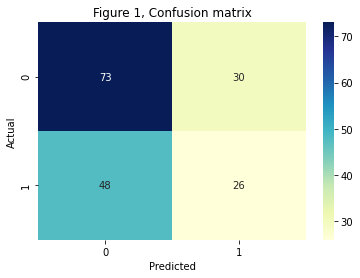

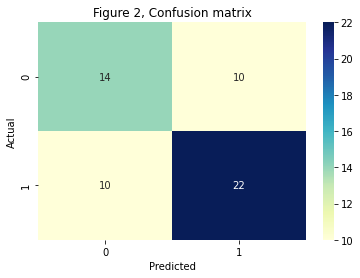

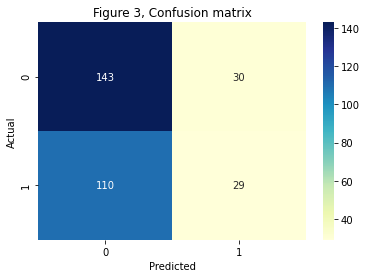

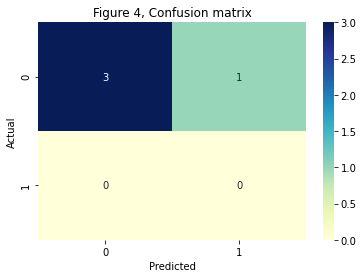

In [65]:
cnf_matrices = [cnf1_matrix, cnf2_matrix, cnf3_matrix, cnf4_matrix]
i = 1
print("Key: Figure 1- Chrome Mobile dataset ")
print("Figure 2- Chrome Mobile WebView dataset ")
print("Figure 3- Platfrom Os 6 dataset ")
print("Figure 4- Platfrom Os 5 dataset ")

for cnf_matrix in cnf_matrices:
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f"Figure {i}, Confusion matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    i += 1


## Decision Tree

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


In [69]:
# Train Decision Tree Classifer
# Test for All datasets
target1_predictions = model_predict(fit_model(clf, X1_train, y1_train), X1_test)
target2_predictions = model_predict(fit_model(clf, X2_train, y2_train), X2_test)
target3_predictions = model_predict(fit_model(clf, X3_train, y3_train), X3_test)
target4_predictions = model_predict(fit_model(clf, X4_train, y4_train), X4_test)

# target1_predictions
target2_predictions
# target3_predictions
# target4_predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

### Validating the Model

In [70]:
# evaluating the model
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores1 = cross_val_score(model, X1_train, y1_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model, X2_train, y2_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model, X3_train, y3_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model, X4_train, y4_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy for browser1 dataset (Chrome Mobile): %.3f (%.3f)' % (mean(scores1), std(scores1)))
print('Accuracy for browser1 dataset (Chrome Mobile WebView): %.3f (%.3f)' % (mean(scores2), std(scores2)))
print('Accuracy for platformOs1 dataset (6): %.3f (%.3f)' % (mean(scores3), std(scores3)))
print('Accuracy for platformOs2 dataset (5): %.3f (%.3f)' % (mean(scores4), std(scores4)))

Accuracy for browser1 dataset (Chrome Mobile): 0.551 (0.014)
Accuracy for browser1 dataset (Chrome Mobile WebView): 0.434 (0.041)
Accuracy for platformOs1 dataset (6): 0.535 (0.035)
Accuracy for platformOs2 dataset (5): 0.433 (0.389)


In [71]:
print ("Chrome Mobile Dataset Score", scores1)
print ("Chrome Mobile WebView Dataset Score", scores2)
print ("Platfrom Os 6 Dataset Score", scores3)
print ("Platfrom Os 5 Dataset Score", scores4)

Chrome Mobile Dataset Score [0.56521739 0.54347826 0.52747253 0.56043956 0.56043956]
Chrome Mobile WebView Dataset Score [0.37931034 0.4137931  0.48275862 0.4137931  0.48275862]
Platfrom Os 6 Dataset Score [0.56790123 0.55555556 0.51234568 0.5617284  0.47826087]
Platfrom Os 5 Dataset Score [0.66666667 1.         0.         0.         0.5       ]


### Confusion Matrix

In [72]:
#Confusion matrix
cnf1_matrix = metrics.confusion_matrix(y1_test, target1_predictions)
cnf2_matrix = metrics.confusion_matrix(y2_test, target2_predictions)
cnf3_matrix = metrics.confusion_matrix(y3_test, target3_predictions)
cnf4_matrix = metrics.confusion_matrix(y4_test, target4_predictions)

In [ ]:
cnf_matrices = [cnf1_matrix, cnf2_matrix, cnf3_matrix, cnf4_matrix]
i = 1
print("Key: Figure 1- Chrome Mobile dataset ")
print("Figure 2- Chrome Mobile WebView dataset ")
print("Figure 3- Platfrom Os 6 dataset ")
print("Figure 4- Platfrom Os 5 dataset ")

for cnf_matrix in cnf_matrices:
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.title(f"Figure {i}, Confusion matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    i += 1
